In [10]:
!mkdir -p ~/.kaggle
!cp /kaggle/input/jssson/kaggle.json ~/.kaggle/

# Load Data From Kaggle

In [11]:
!kaggle datasets download -d marquis03/vehicle-classification

Dataset URL: https://www.kaggle.com/datasets/marquis03/vehicle-classification
License(s): Apache 2.0
 98%|███████████████████████████████████████▎| 897M/914M [00:12<00:00, 63.9MB/s]
100%|████████████████████████████████████████| 914M/914M [00:12<00:00, 77.3MB/s]


# Unzip Data

In [12]:
import zipfile
zip_ref = zipfile.ZipFile('/kaggle/working/vehicle-classification.zip', 'r')
zip_ref.extractall('/kaggle/working/vehicle-classification_N.zip')
zip_ref.close()

# Import Libraries

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten,BatchNormalization
from keras.layers import Conv2D, MaxPooling2D,AveragePooling2D
from keras.optimizers import Adam
import matplotlib.pyplot as plt


# Data Augmentation
* **Expand dataset for better model generalization**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Create an instance of the ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
test_datagen = ImageDataGenerator(rescale=1./255)

# Define your data generator
train_generator = train_datagen.flow_from_directory(
    '/kaggle/working/vehicle-classification_N.zip/train',
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical'
)
valid_generator = test_datagen.flow_from_directory(
    '/kaggle/working/vehicle-classification_N.zip/val',
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical'
)





# Sequential Model 
* **Improve model accuracy by capturing more complex patterns**

In [ ]:
model_3 = Sequential()
model_3.add(Conv2D(64,(4,4),input_shape=(100,100,3),activation='relu',padding='same'))
model_3.add(BatchNormalization())
model_3.add(Conv2D(64,(4,4),input_shape=(100,100,3),activation='relu',padding='same'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Dropout(0.2))

model_3.add(Conv2D(128,(4,4),input_shape=(100,100,3),activation='relu',padding='same'))
model_3.add(BatchNormalization())
model_3.add(Conv2D(128,(4,4),input_shape=(100,100,3),activation='relu',padding='same'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Dropout(0.25))

model_3.add(Conv2D(256,(4,4),input_shape=(100,100,3),activation='relu',padding='same'))
model_3.add(BatchNormalization())
model_3.add(Conv2D(256,(4,4),input_shape=(100,100,3),activation='relu',padding='same'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Dropout(0.35))

model_3.add(Flatten())
model_3.add(Dense(256, activation='relu'))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.5))
model_3.add(Dense(10, activation='softmax'))
model_3.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model_3.summary()

# Model Compilation

In [ ]:
model_3.compile(optimizer="adam",
             loss="categorical_crossentropy",
             metrics=["accuracy"])

# Trains the model on the provided dataset

In [ ]:
model_3.fit(
    train_generator,
    steps_per_epoch=2000,
    epochs=20,
    validation_data=valid_generator,
    validation_steps=800
)


# Evaluate Moodel Test and Train Accuracy

In [ ]:
score=model_3.evaluate(valid_generator,batch_size=32,verbose=1)

In [ ]:
print("test score",score[0])
print("test accuracy",score[1])

# Save Model


In [ ]:
model_3.save('vehicle_Classification_Model.h5')

# Download Model to Local Machine

In [ ]:
from IPython.display import FileLink

# Generate a link to download the model file
FileLink(r'vehicle_Classification_Model.h5')


# Load Model

In [2]:
from keras.models import load_model

# Load the model
model_3 = load_model('/kaggle/input/load-model/vehicle_Classification_Model.h5')


# Predicting Model Accuracy

In [3]:
import cv2
import matplotlib.pyplot as plt

In [4]:
test_img=cv2.imread('/kaggle/input/bbbbbbbb/fb5c65e6c58589b6a9e0b18af737f34f.jpg')

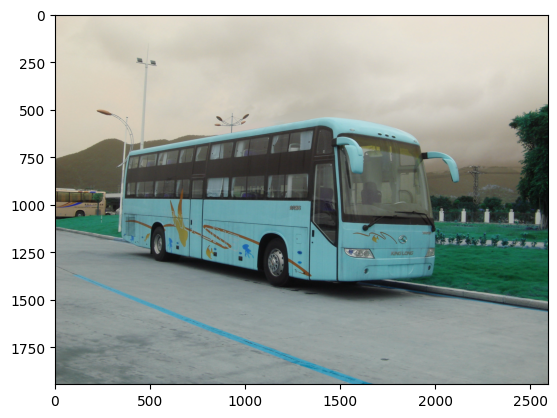

In [5]:
plt.imshow(test_img)

In [6]:
test_img=cv2.resize(test_img,(100,100))

In [7]:
test_input=test_img.reshape((1,100,100,3))

In [9]:
model_3.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)